<a href="https://colab.research.google.com/github/annaqas/projects_codecademy/blob/main/Biodiversity_project_codecademy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Endangered species in different parks.**

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os


# **Exploring data**

In [116]:
species = pd.read_csv('/content/sample_data/species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [117]:
observations = pd.read_csv('/content/sample_data/observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [118]:
data = pd.merge(species, observations)
data.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",NaN,Yosemite National Park,128


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             25632 non-null  object
 1   scientific_name      25632 non-null  object
 2   common_names         25632 non-null  object
 3   conservation_status  880 non-null    object
 4   park_name            25632 non-null  object
 5   observations         25632 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [120]:
print(data['category'].unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [121]:
data.category.value_counts()

Vascular Plant       19560
Bird                  2364
Nonvascular Plant     1332
Mammal                1200
Fish                   524
Amphibian              328
Reptile                324
Name: category, dtype: int64

In [122]:
data['conservation_status'].unique()

array([nan, 'Species of Concern', 'Endangered', 'In Recovery',
       'Threatened'], dtype=object)

In [123]:
data.conservation_status.value_counts()

Species of Concern    732
Endangered             80
Threatened             44
In Recovery            24
Name: conservation_status, dtype: int64

In [124]:
data.park_name.unique()

array(['Bryce National Park', 'Yellowstone National Park',
       'Great Smoky Mountains National Park', 'Yosemite National Park'],
      dtype=object)

In [125]:
data.park_name.value_counts()

Bryce National Park                    6408
Yellowstone National Park              6408
Great Smoky Mountains National Park    6408
Yosemite National Park                 6408
Name: park_name, dtype: int64

In [126]:
sel_data = data[['category', 'conservation_status', 'park_name']].dropna()
sel_data

,category,conservation_status,park_name
64,Mammal,Species of Concern,Bryce National Park
65,Mammal,Species of Concern,Yellowstone National Park
66,Mammal,Species of Concern,Great Smoky Mountains National Park
67,Mammal,Species of Concern,Yosemite National Park
68,Mammal,Endangered,Yosemite National Park
...,...,...,...
24171,Vascular Plant,Species of Concern,Great Smoky Mountains National Park
25044,Vascular Plant,Species of Concern,Bryce National Park
25045,Vascular Plant,Species of Concern,Yosemite National Park
25046,Vascular Plant,Species of Concern,Great Smoky Mountains National Park


# **1) What is the conservation status of the species in the parks?**

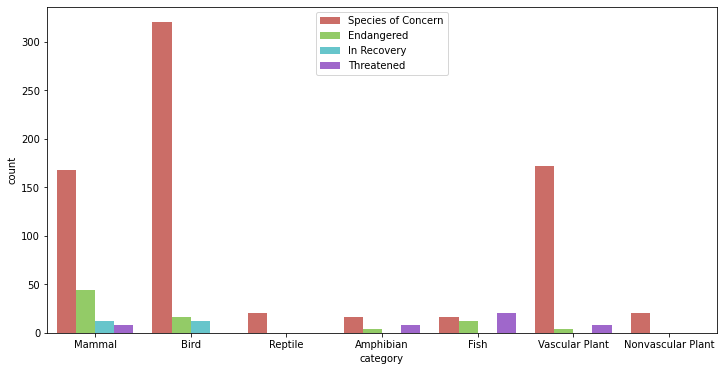

In [205]:
sns.countplot(x='category', data=sel_data, hue='conservation_status', palette='hls')
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=0)
plt.legend(loc=9)
plt.show()

Almost all species are concerned, except the fish, which are also in threat.

# **2) Which animals are in endangered?**

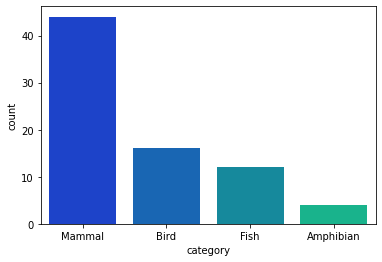

In [184]:
animals = sel_data.apply(lambda row: row[sel_data['category'].isin(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish'])])
animals
animals_danger = animals.apply(lambda row: row[sel_data['conservation_status'].isin(['Endangered'])])

sns.countplot(x='category', data=animals_danger, palette='winter')

The animals that are most endangered are mammals. And an important observation, the reptiles not appear in this analysis. Let´s analyze the reptiles species. 

      category conservation_status                            park_name
2148   Reptile  Species of Concern            Yellowstone National Park
2149   Reptile  Species of Concern               Yosemite National Park
2150   Reptile  Species of Concern                  Bryce National Park
2151   Reptile  Species of Concern  Great Smoky Mountains National Park
2152   Reptile  Species of Concern               Yosemite National Park
2153   Reptile  Species of Concern            Yellowstone National Park
2154   Reptile  Species of Concern                  Bryce National Park
2155   Reptile  Species of Concern  Great Smoky Mountains National Park
16308  Reptile  Species of Concern               Yosemite National Park
16309  Reptile  Species of Concern                  Bryce National Park
16310  Reptile  Species of Concern  Great Smoky Mountains National Park
16311  Reptile  Species of Concern            Yellowstone National Park
20932  Reptile  Species of Concern                  Bryce Nation

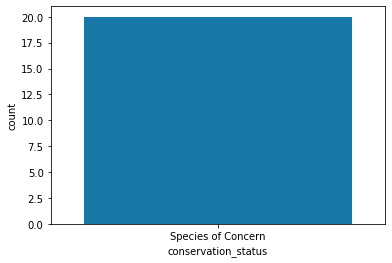

In [186]:
reptiles = sel_data.apply(lambda row: row[sel_data['category'].isin(['Reptile'])])
print(reptiles)
sns.countplot(x='conservation_status', data=reptiles, palette='winter')

The reptiles are the species of concern in all Parks.

# ** 3) Which species spotted the most at each Park?**

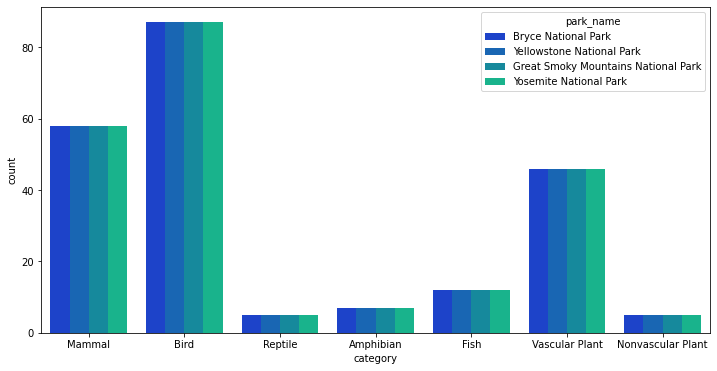

In [127]:
sns.countplot(x='category', data=sel_data, hue='park_name', palette='winter')
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=0)
plt.show()


Bird are the species that spotted the most in all parks.

# **4) Is there significant differences between species and their conservation status?**

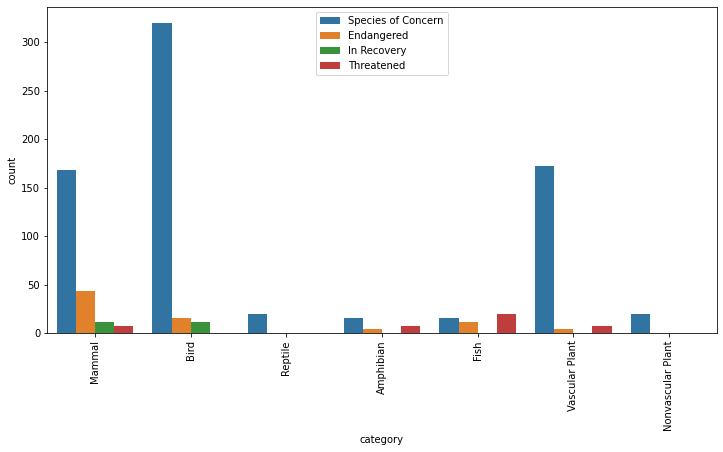

In [194]:
plt.gcf().set_size_inches(12, 6)
sns.countplot(x='category', hue='conservation_status', data=sel_data)
plt.xticks(rotation=90)
plt.legend(loc=9)
plt.show()

In [198]:
from scipy.stats import chi2_contingency

species_conservation = pd.crosstab(sel_data.category, sel_data.conservation_status)
print("observed contingency table:")
print(species_conservation)

# calculate the expected contingency table if there's no association and save it as expected
chi2, pval, dof, expected = chi2_contingency(species_conservation)
print('The chi2 is: ' + str(chi2))
print('The pvalue is: ' + str(pval))
print(np.round(expected))


observed contingency table:
conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Amphibian                     4            0                  16           8
Bird                         16           12                 320           0
Fish                         12            0                  16          20
Mammal                       44           12                 168           8
Nonvascular Plant             0            0                  20           0
Reptile                       0            0                  20           0
Vascular Plant                4            0                 172           8
The chi2 is: 281.6928573184134
The pvalue is: 2.7594442674479634e-49
[[  3.   1.  23.   1.]
 [ 32.   9. 289.  17.]
 [  4.   1.  40.   2.]
 [ 21.   6. 193.  12.]
 [  2.   1.  17.   1.]
 [  2.   1.  17.   1.]
 [ 17.   5. 153.   9.]]


Yes, there is a significant difference between species and their conservation status (p < 0.001)